<a href="https://colab.research.google.com/github/fperezm0/bigdataproyecto/blob/main/Proyecto_Bigdata_Chess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Big Data & Chess 

# Introducción


El ajedrez es uno de los juegos más importantes de la historia de la humanidad, con siglos de infuencia alrededor del mundo,  se juega desde la época medieval y es uno de los juegos más antiguos que aún existen. 

Mucho se ha hablado ya del Big Data y de los desafíos que trae consigo. El almacenamiento, gestión y procesamiento de grandes volúmenes de datos se ha convertido en uno de los principales temas de agenda para áreas tan disímiles como servicios financieros, salud, biología, retail y consumo masivo, entre muchos sectores.

Shyam Sankar compartió en una conferencia la siguiente historia para describir la relación hombre-computadora. En 1997, el campeón mundial de ajedrez Garry Kasparov es vencido por una computadora en una partida de ajedrez. 
A partir de entonces parecía anunciarse una era de supremacía de las máquinas por sobre los seres humanos.
 

Esta era la visión del futuro de la tecnología de J.C.R. Licklider, científico y psicólogo estadounidense: la de una cooperación estrecha hombre-máquina. 
Tomando particularmente el tema de Big Data, almacenar, procesar y acceder a grandes volúmenes de información es necesario pero no suficiente. Allí donde la computadora aporta la gestión, organización y aplicación de patrones a los datos, el ser humano hace lo propio con la creatividad y un enfoque no lineal para el análisis de esa información y la resolución de problemas.
Uno no puede existir sin el otro.




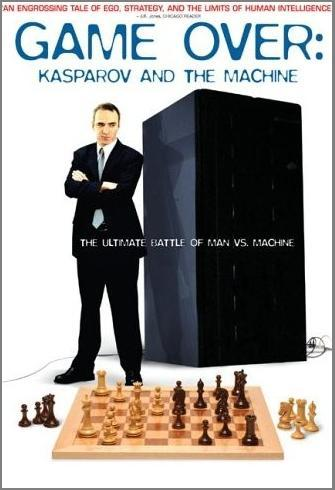

# El primer paso es descargar libreria de python-chess
python-chess es una biblioteca de ajedrez para Python, con generación de movimientos, validación de movimientos y soporte para formatos comunes. 

In [ ]:
pip install chess

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 148 kB 5.3 MB/s 


# Importación librerias

In [ ]:
import chess
import chess.pgn
import pandas as pd
import datetime
import tqdm
import zipfile

# Descarga la base de datos

La base de datos que ocuparemos para este proyecto es abierta y pertenece a Lichess, esta contiene 102000 datos en formato PGN.


In [ ]:
! gdown https://database.nikonoel.fr/lichess_elite_2021-11.zip

Downloading...
From: https://database.nikonoel.fr/lichess_elite_2021-11.zip
To: /content/lichess_elite_2021-11.zip
100% 275M/275M [00:12<00:00, 21.9MB/s]


#  Descomprimir la base de datos

In [ ]:
!unzip lichess_elite_2021-11.zip

Archive:  lichess_elite_2021-11.zip
  inflating: lichess_elite_2021-11.pgn  


# Se Abre y guarda la base de datos 

In [ ]:
pgn = open("lichess_elite_2021-11.pgn")
game = chess.pgn.read_game(pgn)

# Instanciar el tablero de ajedrez

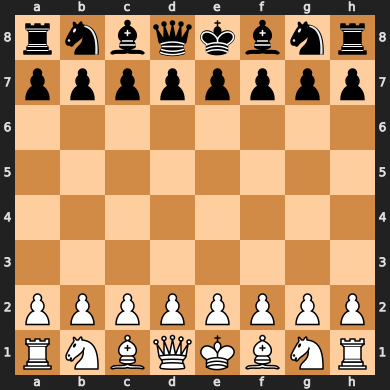

In [ ]:
board = game.board()
board

# Procesar PGN en una forma más amigable con Python

In [ ]:
NUM_GAMES=1000200
rows=[]
with open(f'lichess_elite_2021-11.pgn') as pgn:
    for game in tqdm.tqdm(range(NUM_GAMES)):
        row={}
        game = chess.pgn.read_game(pgn)
        row['headers']=game.headers.__dict__
        row['moves']=[x.uci() for x in game.mainline_moves()]
        rows.append(row)
games=pd.DataFrame(rows)
games

100%|██████████| 1000200/1000200 [1:30:50<00:00, 183.50it/s]


,headers,moves
0,{'_tag_roster': {'Event': 'Rated Blitz tournam...,"[b1c3, d7d5, d2d4, c7c5, g1f3, c5d4, f3d4, e7e..."
1,{'_tag_roster': {'Event': 'Rated Blitz tournam...,"[c2c4, e7e5, b1c3, g8f6, g1f3, b8c6, g2g3, f8b..."
2,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, c7c5, g1f3, e7e6, g2g3, d7d5, e4d5, e6d..."
3,"{'_tag_roster': {'Event': 'Rated Rapid game', ...","[e2e4, c7c6, d2d4, d7d5, e4d5, c6d5, c2c4, g8f..."
4,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[g2g3, e7e5, f1g2, d7d5, d2d3, g8f6, g1f3, f8d..."
...,...,...
1000195,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[b1c3, g7g6, g2g3, f8g7, f1g2, g8f6, f2f4, e8g..."
1000196,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[d2d4, g8f6, c2c4, e7e6, b1c3, b7b6, d4d5, c8b..."
1000197,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, f3d4, g8f..."
1000198,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[d2d4, g8f6, c2c4, c7c5, d4d5, b7b5, c4b5, a7a..."


In [ ]:
! wget https://stockfishchess.org/files/stockfish_14_linux_x64_popcnt.zip && \
    unzip stockfish_14_linux_x64_popcnt.zip stockfish_14_linux_x64_popcnt/stockfish_14_x64_popcnt

--2022-10-08 01:31:05--  https://stockfishchess.org/files/stockfish_14_linux_x64_popcnt.zip
Resolving stockfishchess.org (stockfishchess.org)... 104.25.158.9, 104.25.159.9, 172.67.80.249, ...
Connecting to stockfishchess.org (stockfishchess.org)|104.25.158.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28531469 (27M) [application/zip]
Saving to: ‘stockfish_14_linux_x64_popcnt.zip’

stockfish_14_linux_ 100%[===================>]  27.21M  16.4MB/s    in 1.7s    

2022-10-08 01:31:07 (16.4 MB/s) - ‘stockfish_14_linux_x64_popcnt.zip’ saved [28531469/28531469]

Archive:  stockfish_14_linux_x64_popcnt.zip
  inflating: stockfish_14_linux_x64_popcnt/stockfish_14_x64_popcnt  


In [ ]:
import chess.engine

In [ ]:
engine = chess.engine.SimpleEngine.popen_uci("/content/stockfish_14_linux_x64_popcnt/stockfish_14_x64_popcnt")

In [ ]:
info = engine.analyse(board, chess.engine.Limit(time=1))
info

{'string': 'NNUE evaluation using nn-3475407dc199.nnue enabled',
 'depth': 16,
 'seldepth': 21,
 'multipv': 1,
 'score': PovScore(Cp(+24), WHITE),
 'nodes': 636184,
 'nps': 634914,
 'tbhits': 0,
 'time': 1.002,
 'pv': [Move.from_uci('f2f4'),
  Move.from_uci('a7a5'),
  Move.from_uci('g1f3'),
  Move.from_uci('a5a4'),
  Move.from_uci('h2h4'),
  Move.from_uci('f7f6'),
  Move.from_uci('h4h5'),
  Move.from_uci('f8e7'),
  Move.from_uci('g2g3'),
  Move.from_uci('c5d4'),
  Move.from_uci('c3d4'),
  Move.from_uci('e8g8'),
  Move.from_uci('f1h3'),
  Move.from_uci('f6e5'),
  Move.from_uci('d4e5'),
  Move.from_uci('d8b6'),
  Move.from_uci('h3e6'),
  Move.from_uci('g8h8')],
 'hashfull': 313}

In [ ]:
games['lichess_id']=games['headers'].apply(lambda x: x.get("_others",{}).get("LichessURL","").split("/")[-1])
games['white_elo']=games['headers'].apply(lambda x: x.get("_others",{}).get("WhiteElo","").split("-")[0]).astype(int)
games['black_elo']=games['headers'].apply(lambda x: x.get("_others",{}).get("BlackElo","").split("-")[0]).astype(int)
games['opening_name']=games['headers'].apply(lambda x: x.get("_others",{}).get("Opening",""))

games['white_score']=games['headers'].apply(lambda x: x.get("_tag_roster",{}).get("Result","").split("-")[0].replace("1/2",".5")).astype(float)
games

,headers,moves,lichess_id,white_elo,black_elo,opening_name,white_score,white_elo_advantage
0,{'_tag_roster': {'Event': 'Rated Blitz tournam...,"[b1c3, d7d5, d2d4, c7c5, g1f3, c5d4, f3d4, e7e...",mULJ1mAO,2402,2320,"Queen's Pawn Game: Chigorin Variation, Irish G...",0.0,82
1,{'_tag_roster': {'Event': 'Rated Blitz tournam...,"[c2c4, e7e5, b1c3, g8f6, g1f3, b8c6, g2g3, f8b...",cqF8HALX,2498,2402,"English Opening: King's English Variation, Fou...",0.0,96
2,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, c7c5, g1f3, e7e6, g2g3, d7d5, e4d5, e6d...",BYr8UVzt,2570,2415,Sicilian Defense: French Variation,0.0,155
3,"{'_tag_roster': {'Event': 'Rated Rapid game', ...","[e2e4, c7c6, d2d4, d7d5, e4d5, c6d5, c2c4, g8f...",Xu7QFMIA,2502,2355,"Caro-Kann Defense: Panov Attack, Modern Defense",1.0,147
4,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[g2g3, e7e5, f1g2, d7d5, d2d3, g8f6, g1f3, f8d...",o0aulgw1,2607,2549,Hungarian Opening,0.0,58
...,...,...,...,...,...,...,...,...
1000195,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[b1c3, g7g6, g2g3, f8g7, f1g2, g8f6, f2f4, e8g...",BP3RqI5S,2413,2559,Van Geet Opening,0.0,-146
1000196,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[d2d4, g8f6, c2c4, e7e6, b1c3, b7b6, d4d5, c8b...",8zUjpaUE,2304,2447,Indian Defense: Normal Variation,1.0,-143
1000197,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, f3d4, g8f...",nGb7IFqM,2598,2597,"Sicilian Defense: Najdorf Variation, English A...",0.5,1
1000198,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[d2d4, g8f6, c2c4, c7c5, d4d5, b7b5, c4b5, a7a...",JD43shek,2524,2429,Benko Gambit Accepted: Fully Accepted Variation,0.5,95


In [ ]:
pip install ftfy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.2 MB/s 


In [ ]:
import ftfy
ftfy.fix_encoding("GrÃ¼nfeld Defense: Exchange Variation")

'Grünfeld Defense: Exchange Variation'

In [ ]:
games['opening_name']=games['opening_name'].apply(ftfy.fix_encoding)
games['opening_name']

0          Queen's Pawn Game: Chigorin Variation, Irish G...
1          English Opening: King's English Variation, Fou...
2                         Sicilian Defense: French Variation
3            Caro-Kann Defense: Panov Attack, Modern Defense
4                                          Hungarian Opening
                                 ...                        
1000195                                     Van Geet Opening
1000196                     Indian Defense: Normal Variation
1000197    Sicilian Defense: Najdorf Variation, English A...
1000198      Benko Gambit Accepted: Fully Accepted Variation
1000199                        Slav Defense: Quiet Variation
Name: opening_name, Length: 1000200, dtype: object

In [ ]:
games['opening_name']

0          Queen's Pawn Game: Chigorin Variation, Irish G...
1          English Opening: King's English Variation, Fou...
2                         Sicilian Defense: French Variation
3            Caro-Kann Defense: Panov Attack, Modern Defense
4                                          Hungarian Opening
                                 ...                        
1000195                                     Van Geet Opening
1000196                     Indian Defense: Normal Variation
1000197    Sicilian Defense: Najdorf Variation, English A...
1000198      Benko Gambit Accepted: Fully Accepted Variation
1000199                        Slav Defense: Quiet Variation
Name: opening_name, Length: 1000200, dtype: object

In [ ]:
games['white_score'].value_counts()

1.0    480298
0.0    434610
0.5     85292
Name: white_score, dtype: int64

In [ ]:
import scipy.stats as stats
games['white_elo_advantage']=games['white_elo']-games['black_elo']


In [ ]:
stats.pointbiserialr(games['white_elo'], games['black_elo'])


PointbiserialrResult(correlation=0.4614890386301684, pvalue=0.0)

In [ ]:
games['opening_name']

0          Queen's Pawn Game: Chigorin Variation, Irish G...
1          English Opening: King's English Variation, Fou...
2                         Sicilian Defense: French Variation
3            Caro-Kann Defense: Panov Attack, Modern Defense
4                                          Hungarian Opening
                                 ...                        
1000195                                     Van Geet Opening
1000196                     Indian Defense: Normal Variation
1000197    Sicilian Defense: Najdorf Variation, English A...
1000198      Benko Gambit Accepted: Fully Accepted Variation
1000199                        Slav Defense: Quiet Variation
Name: opening_name, Length: 1000200, dtype: object

In [ ]:

variation ='French Defense: Classical Variation'
  
df = pd.DataFrame(games)
gameVaration = df[df['opening_name'].str.contains(variation, case=False)]
  
print(gameVaration)

                                                   headers  \
22       {'_tag_roster': {'Event': 'Rated Blitz game', ...   
65       {'_tag_roster': {'Event': 'Rated Blitz game', ...   
148      {'_tag_roster': {'Event': 'Rated Blitz game', ...   
184      {'_tag_roster': {'Event': 'Rated Blitz game', ...   
445      {'_tag_roster': {'Event': 'Rated Blitz game', ...   
...                                                    ...   
999476   {'_tag_roster': {'Event': 'Rated Blitz game', ...   
999722   {'_tag_roster': {'Event': 'Rated Blitz game', ...   
999754   {'_tag_roster': {'Event': 'Rated Blitz game', ...   
999910   {'_tag_roster': {'Event': 'Rated Blitz game', ...   
1000043  {'_tag_roster': {'Event': 'Rated Blitz game', ...   

                                                     moves lichess_id  \
22       [d2d4, g8f6, b1c3, d7d5, c1g5, e7e6, e2e4, d5e...   KdLwSIb6   
65       [e2e4, e7e6, d2d4, d7d5, b1c3, g8f6, e4e5, f6d...   nVroEkR3   
148      [e2e4, e7e6, d2d4, d7d5, b1

In [ ]:
piece_scores={
    "p": 1,
    "P": -1,
    "r": 5,
    "R": -5,
    "n": 3,
    "N": -3,
    "b": 3,
    "B": -3,
    "q": 9,
    "Q": -9
}

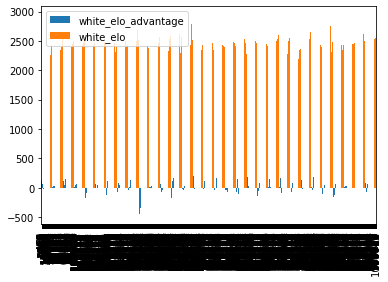

In [ ]:
gameVaration[['white_elo_advantage','white_elo']].plot(kind="bar")

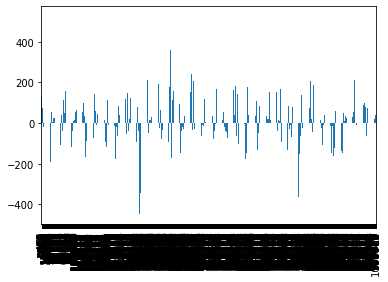

In [ ]:
gameVaration['white_elo_advantage'].plot(kind="bar")

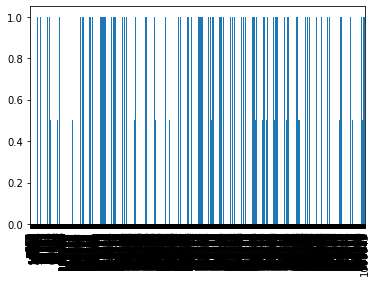

In [ ]:
gameVaration['white_score'].plot(kind="bar")

In [ ]:
game=gameVaration.iloc[2]
game['headers']

{'_tag_roster': {'Event': 'Rated Blitz game',
  'Site': '?',
  'Date': '2021.11.01',
  'Round': '-',
  'White': 'Ataque_Rey',
  'Black': 'ImSNT',
  'Result': '0-1'},
 '_others': {'LichessURL': 'https://lichess.org/f0Bzf4LM',
  'WhiteElo': '2539',
  'BlackElo': '2546',
  'ECO': 'C11',
  'Opening': 'French Defense: Classical Variation, Steinitz Variation',
  'TimeControl': '180+0',
  'UTCDate': '2021.11.01',
  'UTCTime': '00:11:16',
  'Termination': 'Normal',
  'WhiteRatingDiff': '-6',
  'BlackRatingDiff': '+5'}}

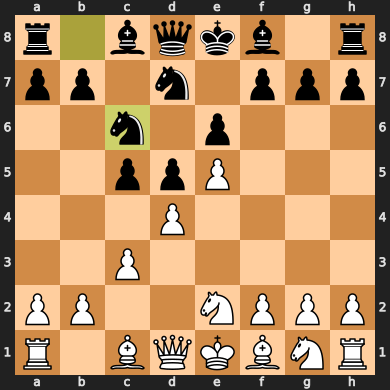

In [ ]:
move_number=12
row={}
row['taken']=[]
board=chess.Board()
for san in game['moves'][:move_number]:
    parsed_san=board.parse_san(san)#move by the san "Standard Algebraic Notation"
    taken=board.piece_at(parsed_san.to_square)
    if taken:
        row['taken'].append(taken.__str__())
    move=board.push_san(san)
board

In [ ]:
def play_board(moves):
    #Adding this function to make investigating easier
    taken_pieces=[]
    board=chess.Board()
    for san in moves:
        parsed_san=board.parse_san(san)
        taken=board.piece_at(parsed_san.to_square)
        if taken:
            taken_pieces.append(taken.__str__())
        move=board.push_san(san)
    return board,taken_pieces

def build_stored_game_analysis_smart_dumb(game, move_number):
    row={}
    row['move_number']=move_number
    board,row['taken']=play_board(game['moves'][:move_number])

    row['invalid']=bool(board.promoted) or bool(board.outcome())
    
    
    
    row['taken_score']=sum([piece_scores.get(p) for p in row['taken']])*100
    row['fen']=board.fen()
    row['url']=game['headers'].get("_others",{}).get("LichessURL","")+f"#{move_number}"
    try:
        row['last_move']=san
    except:
        print(game)
        row['invalid']=True
    return row
row=build_stored_game_analysis_smart_dumb(game, 20)
row

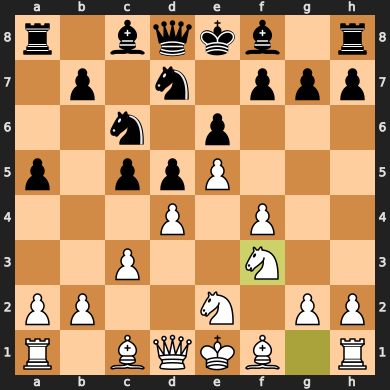

In [ ]:
play_board(game['moves'][:15])[0]

In [ ]:
rows=[]
for move_number in tqdm.tqdm(range(1,100000+1)):
    if move_number>len(game['moves']):
        break
    rows.append(build_stored_game_analysis_smart_dumb(game, move_number))
moves=pd.DataFrame(rows).set_index("move_number")
moves

  0%|          | 98/100000 [00:00<05:40, 292.98it/s]


,taken,invalid,taken_score,fen,url,last_move
move_number,,,,,,
1,[],False,0,rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR ...,https://lichess.org/f0Bzf4LM#1,b8c6
2,[],False,0,rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBN...,https://lichess.org/f0Bzf4LM#2,b8c6
3,[],False,0,rnbqkbnr/pppp1ppp/4p3/8/3PP3/8/PPP2PPP/RNBQKBN...,https://lichess.org/f0Bzf4LM#3,b8c6
4,[],False,0,rnbqkbnr/ppp2ppp/4p3/3p4/3PP3/8/PPP2PPP/RNBQKB...,https://lichess.org/f0Bzf4LM#4,b8c6
5,[],False,0,rnbqkbnr/ppp2ppp/4p3/3p4/3PP3/2N5/PPP2PPP/R1BQ...,https://lichess.org/f0Bzf4LM#5,b8c6
...,...,...,...,...,...,...
94,"[p, P, p, P, N, n, B, b, N, n, r, R, P, r, R, ...",True,-900,8/4b1k1/2K1p3/3p1p1Q/6p1/6qp/8/1q6 w - - 0 48,https://lichess.org/f0Bzf4LM#94,b8c6
95,"[p, P, p, P, N, n, B, b, N, n, r, R, P, r, R, ...",True,-900,8/3Kb1k1/4p3/3p1p1Q/6p1/6qp/8/1q6 b - - 1 48,https://lichess.org/f0Bzf4LM#95,b8c6
96,"[p, P, p, P, N, n, B, b, N, n, r, R, P, r, R, ...",True,-900,8/1q1Kb1k1/4p3/3p1p1Q/6p1/6qp/8/8 w - - 2 49,https://lichess.org/f0Bzf4LM#96,b8c6


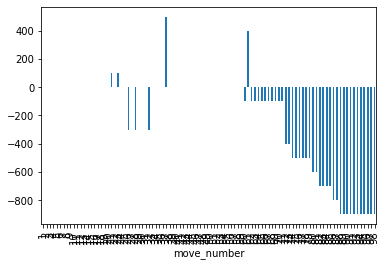

In [ ]:
moves['taken_score'].plot(kind="bar")

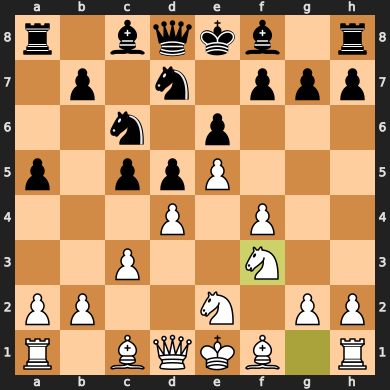

In [ ]:
play_board(game['moves'][:15])[0]

In [ ]:
info = engine.analyse(play_board(game['moves'][:15])[0], chess.engine.Limit(time=1))
info

{'string': 'NNUE evaluation using nn-3475407dc199.nnue enabled',
 'depth': 17,
 'seldepth': 23,
 'multipv': 1,
 'score': PovScore(Cp(-19), BLACK),
 'nodes': 585242,
 'nps': 584657,
 'tbhits': 0,
 'time': 1.001,
 'pv': [Move.from_uci('a5a4'),
  Move.from_uci('c1e3'),
  Move.from_uci('d8b6'),
  Move.from_uci('d1c2'),
  Move.from_uci('f8e7'),
  Move.from_uci('a2a3'),
  Move.from_uci('e8g8'),
  Move.from_uci('e2c1'),
  Move.from_uci('c5d4'),
  Move.from_uci('c3d4'),
  Move.from_uci('c6a5'),
  Move.from_uci('f1d3'),
  Move.from_uci('a5c4'),
  Move.from_uci('d3c4'),
  Move.from_uci('d5c4')],
 'hashfull': 299}

In [ ]:
info['score'].pov(chess.BLACK)

Cp(-19)

In [ ]:
info['score'].pov(chess.WHITE)

Cp(+19)

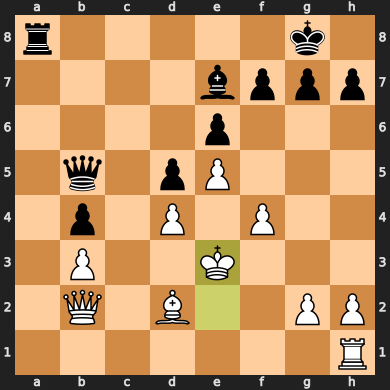

In [ ]:
play_board(game['moves'][:45])[0]

In [ ]:
info = engine.analyse(play_board(game['moves'][:45])[0], chess.engine.Limit(time=1))
info

{'string': 'NNUE evaluation using nn-3475407dc199.nnue enabled',
 'depth': 18,
 'seldepth': 25,
 'multipv': 1,
 'score': PovScore(Cp(+132), BLACK),
 'nodes': 680979,
 'nps': 678942,
 'tbhits': 0,
 'time': 1.003,
 'pv': [Move.from_uci('h7h5'),
  Move.from_uci('b2c2'),
  Move.from_uci('a8a3'),
  Move.from_uci('h1b1'),
  Move.from_uci('g7g6'),
  Move.from_uci('g2g3'),
  Move.from_uci('g8g7'),
  Move.from_uci('h2h3'),
  Move.from_uci('b5b7'),
  Move.from_uci('g3g4'),
  Move.from_uci('h5g4'),
  Move.from_uci('h3g4'),
  Move.from_uci('b7a8'),
  Move.from_uci('b1h1'),
  Move.from_uci('a3a1'),
  Move.from_uci('h1a1'),
  Move.from_uci('a8a1'),
  Move.from_uci('d2c1')],
 'hashfull': 312}

In [ ]:
info['score'].pov(chess.BLACK)

Cp(+132)

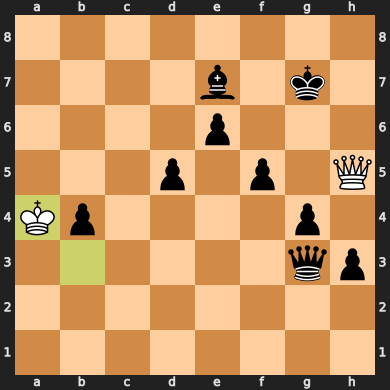

In [ ]:
play_board(game['moves'][:89])[0]

In [ ]:
info = engine.analyse(play_board(game['moves'][:89])[0], chess.engine.Limit(time=1))
info

{'string': 'NNUE evaluation using nn-3475407dc199.nnue enabled',
 'depth': 28,
 'seldepth': 28,
 'multipv': 1,
 'score': PovScore(Cp(+8631), BLACK),
 'nodes': 1990254,
 'nps': 1988265,
 'tbhits': 0,
 'time': 1.001,
 'pv': [Move.from_uci('g3h4'),
  Move.from_uci('h5e8'),
  Move.from_uci('h3h2'),
  Move.from_uci('a4b5'),
  Move.from_uci('h2h1q'),
  Move.from_uci('e8d7'),
  Move.from_uci('g4g3'),
  Move.from_uci('b5c6'),
  Move.from_uci('h4c4'),
  Move.from_uci('c6b7'),
  Move.from_uci('c4c5'),
  Move.from_uci('d7c6'),
  Move.from_uci('c5c6'),
  Move.from_uci('b7c6'),
  Move.from_uci('g3g2'),
  Move.from_uci('c6c7'),
  Move.from_uci('d5d4'),
  Move.from_uci('c7d7'),
  Move.from_uci('g2g1q'),
  Move.from_uci('d7e6'),
  Move.from_uci('b4b3'),
  Move.from_uci('e6e7')],
 'hashfull': 525}

In [ ]:
info['score'].pov(chess.BLACK)

Cp(+8631)

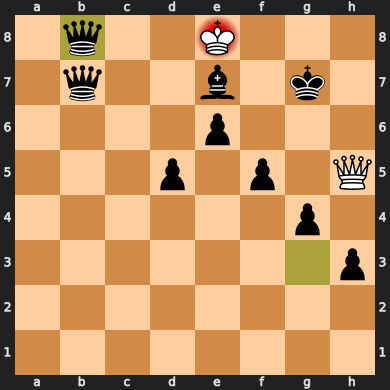

In [ ]:
play_board(game['moves'][:99])[0]

In [ ]:
info = engine.analyse(play_board(game['moves'][:99])[0], chess.engine.Limit(time=1))
info

{'string': 'NNUE evaluation using nn-3475407dc199.nnue enabled',
 'depth': 0,
 'score': PovScore(Mate(-0), WHITE)}